In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [85]:
train=pd.read_csv('train.csv')
test =pd.read_csv("test.csv")

In [86]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
train.shape

(891, 12)

In [89]:
test.shape

(418, 11)

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [92]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

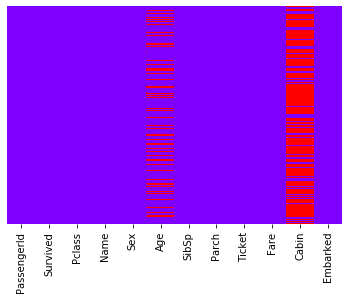

In [94]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='rainbow')

# HEATMAP used for checking values in bulk

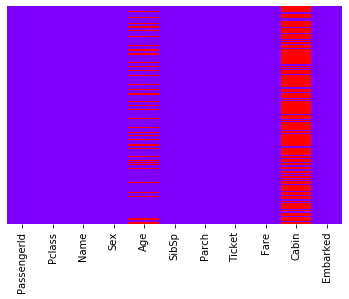

In [95]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='rainbow')


# Exploratory Data Anlysis¶


# First we'll separate categorical and numerical features in our data set



In [96]:
categorical_features = [features for features in train.columns if train[features].dtype=="O"]
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [97]:
numerical_features = [features for features in train.columns if train[features].dtype!="O"]
numerical_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

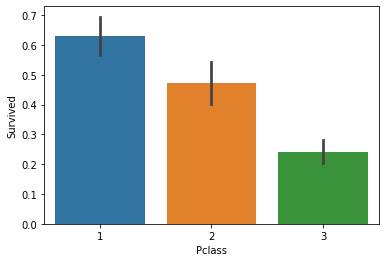

In [98]:
sns.barplot(x="Pclass",y="Survived",data=train)

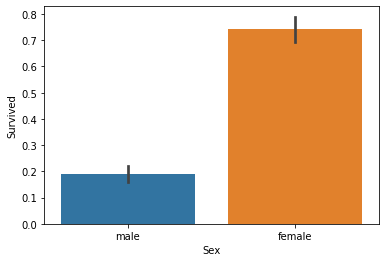

In [99]:
sns.barplot(x="Sex",y="Survived",data=train)

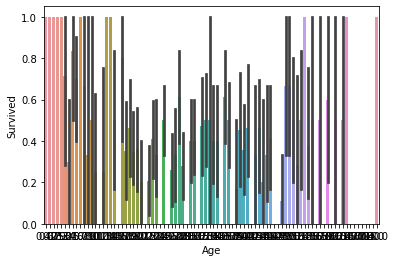

In [100]:
sns.barplot(x="Age",y="Survived",data=train)

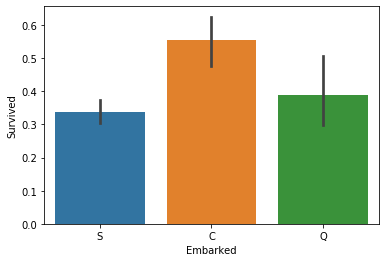

In [101]:
sns.barplot(x="Embarked",y="Survived",data=train)

# From the above graphs we can easily depict the relation between Survived and mentioned features

As most of the first class passengers survived,

Females Survived more than males,

People who embarked from "C" had more chances of survival

In [102]:
y_train = train['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [103]:
ntrain=train.shape[0]
ntest = test.shape[0]

In [104]:
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['Survived'],axis=1,inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1309, 11)


In [105]:
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Feature Engineering
After merging data we'll perform our feature engineering on data. We'll perform following 3 things

fill missing values

Create new column Family size,fare per person,Title and mapping the categorical features

Dropping Columns that are not important

In [106]:
#Filling missing values Age, fare and Embarked, Cabin have missing values we'll 
#take different approach to fill them , but we'll drop the Cabin 
#feature because it's usually advised to drop feature with high amount of missing values(>50%)

In [107]:
age_by_pclass_sex =all_data.groupby(['Sex', 'Pclass']).median()['Age']
for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(all_data['Age'].median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [108]:
all_data['Age']= all_data.groupby(['Sex','Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))
all_data['Age'].isnull().sum()

0

In [109]:
#filling the missing value in Embarked by mode(most freqquent) value
mode=all_data['Embarked'].mode()
all_data['Embarked']= all_data['Embarked'].fillna('mode')

In [110]:
#filling fare
med_fare= all_data.groupby(['Pclass','Parch','SibSp']).Fare.median()[3][0][0]
med_fare

7.8542

In [111]:
all_data['Fare'] = all_data['Fare'].fillna(med_fare)


In [112]:
#now checking all the missing value
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [113]:
#family size is sum of SibSp(siblings / spouses aboard the Titanic) and Parch(parents / children aboard the Titanic)
all_data['Family_size']= all_data['SibSp']+all_data['Parch']+1

In [114]:
#creating column title
all_data['Title'] = all_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
all_data['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Title, Length: 1309, dtype: object

In [115]:
all_data['FarePerPerson']= all_data['Fare']/all_data['Family_size']
all_data['FarePerPerson']

0         3.625000
1        35.641650
2         7.925000
3        26.550000
4         8.050000
           ...    
1304      8.050000
1305    108.900000
1306      7.250000
1307      8.050000
1308      7.452767
Name: FarePerPerson, Length: 1309, dtype: float64

In [117]:
#dropping columns that are not important
all_data.drop(['Ticket','SibSp','Name','Parch','Cabin'],axis=1,inplace=True)

KeyError: "['Ticket' 'SibSp' 'Name' 'Parch' 'Cabin'] not found in axis"

In [119]:
all_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family_size,Title,FarePerPerson
0,1,3,male,22.0,7.2500,S,2,Mr,3.62500
1,2,1,female,38.0,71.2833,C,2,Mrs,35.64165
2,3,3,female,26.0,7.9250,S,1,Miss,7.92500
3,4,1,female,35.0,53.1000,S,2,Mrs,26.55000
4,5,3,male,35.0,8.0500,S,1,Mr,8.05000


In [120]:
all_data=all_data.drop(['Fare'],axis=1)

In [122]:
#Mapping categorical features

#I will use the label encoder function provided by scikit learn for pre-processing but we can also use mapping function

In [123]:
categorical_features=[features for features in all_data.columns if all_data[features].dtypes=='O']
categorical_features

['Sex', 'Embarked', 'Title']

In [125]:
from sklearn.preprocessing import LabelEncoder
# process columns, apply LabelEncoder to categorical features
lbl= LabelEncoder()
lbl.fit(list(all_data['Title'].values)) 
all_data['Title'] = lbl.transform(list(all_data['Title'].values))

In [126]:
all_data['Title'].head()

0    12
1    13
2     9
3    13
4    12
Name: Title, dtype: int64

In [127]:
lbl.fit(list(all_data['Sex'].values)) 
all_data['Sex'] = lbl.transform(list(all_data['Sex'].values))

In [128]:
lbl.fit(list(all_data['Embarked'].values)) 
all_data['Embarked'] = lbl.transform(list(all_data['Embarked'].values))

In [129]:
all_data.head()

,PassengerId,Pclass,Sex,Age,Embarked,Family_size,Title,FarePerPerson
0,1,3,1,22.0,2,2,12,3.62500
1,2,1,0,38.0,0,2,13,35.64165
2,3,3,0,26.0,2,1,9,7.92500
3,4,1,0,35.0,2,2,13,26.55000
4,5,3,1,35.0,2,1,12,8.05000


In [130]:
    #seperating data
train = all_data[:ntrain]
test = all_data[ntrain:]

In [131]:
train.corr()


,PassengerId,Pclass,Sex,Age,Embarked,Family_size,Title,FarePerPerson
PassengerId,1.000000,-0.035144,0.042939,0.038742,0.013083,-0.040143,0.033879,0.026303
Pclass,-0.035144,1.000000,0.131900,-0.417667,0.157112,0.065997,0.032520,-0.485079
Sex,0.042939,0.131900,1.000000,0.101354,0.104057,-0.200988,0.245085,-0.115143
Age,0.038742,-0.417667,0.101354,1.000000,-0.005409,-0.258986,0.287455,0.180237
Embarked,0.013083,0.157112,0.104057,-0.005409,1.000000,0.064701,0.072720,-0.228555
Family_size,-0.040143,0.065997,-0.200988,-0.258986,0.064701,1.000000,-0.196715,-0.099173
Title,0.033879,0.032520,0.245085,0.287455,0.072720,-0.196715,1.000000,-0.051322
FarePerPerson,0.026303,-0.485079,-0.115143,0.180237,-0.228555,-0.099173,-0.051322,1.000000


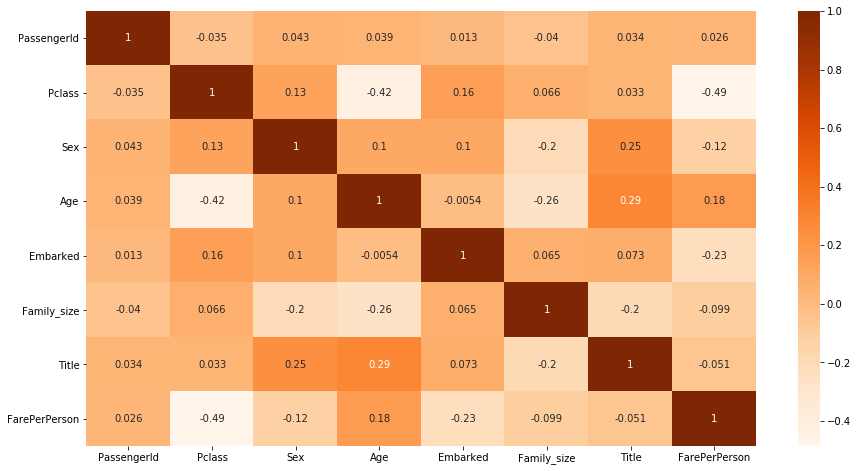

In [132]:
plt.subplots(figsize=(15,8))

sns.heatmap(train.corr(),annot=True,cmap='Oranges')

In [133]:
#finally fitting our training set and making prediction

In [135]:
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
x= train
x

,PassengerId,Pclass,Sex,Age,Embarked,Family_size,Title,FarePerPerson
0,1,3,1,22.0,2,2,12,3.62500
1,2,1,0,38.0,0,2,13,35.64165
2,3,3,0,26.0,2,1,9,7.92500
3,4,1,0,35.0,2,2,13,26.55000
4,5,3,1,35.0,2,1,12,8.05000
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,2,1,15,13.00000
887,888,1,0,19.0,2,1,9,30.00000
888,889,3,0,22.0,2,4,9,5.86250
889,890,1,1,26.0,0,1,12,30.00000


In [136]:
GBR = GradientBoostingClassifier(n_estimators=100, max_depth=4)
GBR.fit(x,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [137]:
#finalMdG is the prediction by GradientBoostingClassifier
finalMdG=GBR.predict(test)
finalMdG

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [138]:
ID = test['PassengerId']
submission=pd.DataFrame()
submission['PassengerId'] = ID
submission['Survived'] = finalMdG
submission.to_csv('submissiongb.csv',index=False)
rd=RandomForestClassifier()
rd.fit(x,y_train)
#finalMdR is the prediction by RandomForestClassifier
finalMdR=rd.predict(test)
finalMdR

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [139]:
submission=pd.DataFrame()
submission['PassengerId'] = ID
submission['Survived'] = finalMdR
submission.to_csv('submissionrd.csv',index=False)